# W205 Project 1
## By: Shanie Hsieh

### Install Packages

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## What are the 5 most popular trips that you would call "commuter trips"?

What are commuter trips?
- Trips made during rush hour (Monday-Friday 7am-9am and 4pm-6pm)
- Have different start and end stations

We will be look at the 5 most popular stations in use during these commuter trips as well as the 5 most popular trips defined by the start station to end station.

First, let's create our dataset for exploration, filtering to meet the criteria above.

In [55]:
%%bigquery commuter_trips

SELECT *
FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
WHERE EXTRACT(DAYOFWEEK FROM start_date) in (2,3,4,5,6) 
AND ((EXTRACT(HOUR FROM start_date) >= 7 AND EXTRACT(HOUR FROM start_date) <= 9) 
     OR (EXTRACT(HOUR FROM start_date) >= 16 AND EXTRACT(HOUR FROM start_date) <= 18))
AND start_station_id != end_station_id

Downloading: 100%|██████████| 554131/554131 [00:02<00:00, 275839.34rows/s]


In [56]:
commuter_trips.shape

(554131, 11)

In [57]:
commuter_trips.head()

,trip_id,duration_sec,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_number,zip_code,subscriber_type
0,957659,587,2015-10-05 16:41:00+00:00,Sequoia Hospital,21,2015-10-05 16:51:00+00:00,Mezes,83,650,94063,Subscriber
1,1029835,301,2015-12-04 17:32:00+00:00,Redwood City Caltrain Station,22,2015-12-04 17:37:00+00:00,Mezes,83,155,94063,Subscriber
2,951818,206,2015-09-30 09:59:00+00:00,Redwood City Caltrain Station,22,2015-09-30 10:02:00+00:00,Mezes,83,175,94707,Subscriber
3,987584,325,2015-10-27 17:32:00+00:00,Redwood City Caltrain Station,22,2015-10-27 17:38:00+00:00,Mezes,83,52,94063,Subscriber
4,1009081,385,2015-11-13 17:09:00+00:00,Redwood City Caltrain Station,22,2015-11-13 17:15:00+00:00,Mezes,83,199,94063,Subscriber


Let's take a look at the frequency of trips at start stations.

In [58]:
%%bigquery commuter_trips_start

SELECT start_station_id, count(*) as total_trips
FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
WHERE EXTRACT(DAYOFWEEK FROM start_date) in (2,3,4,5,6) 
AND ((EXTRACT(HOUR FROM start_date) >= 7 AND EXTRACT(HOUR FROM start_date) <= 9) 
     OR (EXTRACT(HOUR FROM start_date) >= 16 AND EXTRACT(HOUR FROM start_date) <= 18))
AND start_station_id != end_station_id
GROUP BY start_station_id
ORDER BY total_trips DESC 

Downloading: 100%|██████████| 74/74 [00:02<00:00, 30.74rows/s]


In [59]:
commuter_trips_start.head()

,start_station_id,total_trips
0,70,52211
1,69,40100
2,55,28772
3,50,26890
4,74,25107


From this aggregation, we can see that these 5 station ids are the most freqent start points during commuter trips. A look into the station ids from bikeshare_stations, we can extract the station names. So, our top 5 start locations are: 
1. Station ID 70: San Francisco Caltrain (Townsend at 4th)
2. Station ID 69: San Francisco Caltrain 2 (330 Townsend)
3. Station ID 55: Temporary Transbay Terminal (Howard at Beale)
4. Station ID 50: Harry Bridges Plaza (Ferry Building)
5. Station ID 74: Steuart at Market

Let's see a visualization of the top 10 start stations and their frequency in use during commuter trips.

In [60]:
commuter_trips_start_ten = commuter_trips_start.head(10)

Text(0.5, 1.0, 'Top 10 Start Stations for Commuter Trips')

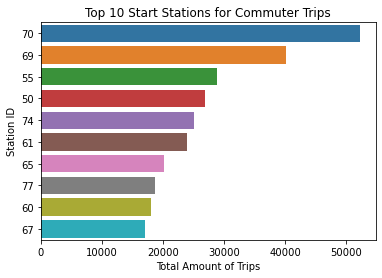

In [61]:
ax = sns.barplot(y = commuter_trips_start_ten["start_station_id"], x = commuter_trips_start_ten["total_trips"], orient = "h", order = commuter_trips_start_ten["start_station_id"])
ax.set_xlabel('Total Amount of Trips')
ax.set_ylabel('Station ID')
ax.set_title('Top 10 Start Stations for Commuter Trips')

Seeing these 5 most popular start stations, it would be interesting to see if the overall trips from start and end station correlate with these popular start stations we see. Let's look at the 5 most popular trips involving the 5 stations listed above and then look at the 5 most popular trips in the whole dataset.

In [90]:
%%bigquery commuter_trips_top_stations

SELECT *
FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
WHERE EXTRACT(DAYOFWEEK FROM start_date) in (2,3,4,5,6) 
AND ((EXTRACT(HOUR FROM start_date) >= 7 AND EXTRACT(HOUR FROM start_date) <= 9) 
     OR (EXTRACT(HOUR FROM start_date) >= 16 AND EXTRACT(HOUR FROM start_date) <= 18))
AND start_station_id != end_station_id
AND start_station_id in (50,55,69,70,74)

Downloading: 100%|██████████| 173080/173080 [00:02<00:00, 66470.93rows/s] 


In [91]:
commuter_trips_top_stations.shape

(173080, 11)

Our dataset went from 554,131 trips to 173,080 trips, limiting the data we are looking at. Let's group the trips from start station to end station.

In [92]:
%%bigquery commuter_trips_top_stations

SELECT start_station_id, end_station_id, count(*) as total_trips
FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
WHERE EXTRACT(DAYOFWEEK FROM start_date) in (2,3,4,5,6) 
AND ((EXTRACT(HOUR FROM start_date) >= 7 AND EXTRACT(HOUR FROM start_date) <= 9) 
     OR (EXTRACT(HOUR FROM start_date) >= 16 AND EXTRACT(HOUR FROM start_date) <= 18))
AND start_station_id != end_station_id
AND start_station_id in (50,55,69,70,74)
GROUP BY start_station_id, end_station_id
ORDER BY total_trips DESC 

Downloading: 100%|██████████| 178/178 [00:01<00:00, 102.58rows/s]


In [93]:
commuter_trips_top_stations.head()

,start_station_id,end_station_id,total_trips
0,50,61,5127
1,69,65,5040
2,70,50,4689
3,74,61,4632
4,55,70,4584


From the most popular start stations, we see the most top 5 trips made involving those start stations are: 
1. 50 (Harry Bridges Plaza (Ferry Building)) -> 61 (Civic Center BART (7th at Market))
2. 69 (San Francisco Caltrain 2 (330 Townsend)) -> 65 (Market at 4th)
3. 70 (Ryland Park) -> 50 (2nd at Townsend)
4. 74 (Steuart at Market) -> 61 (Civic Center BART (7th at Market))
5. 55 (South Van Ness at Market) -> 70 (Ryland Park)

Now, taking the original dataset with the commuter trip filters, let's look at the most popular trips from start station to end station.

In [94]:
%%bigquery commuter_trips_top_trips

SELECT start_station_id, end_station_id, count(*) as total_trips
FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
WHERE EXTRACT(DAYOFWEEK FROM start_date) in (2,3,4,5,6) 
AND ((EXTRACT(HOUR FROM start_date) >= 7 AND EXTRACT(HOUR FROM start_date) <= 9) 
     OR (EXTRACT(HOUR FROM start_date) >= 16 AND EXTRACT(HOUR FROM start_date) <= 18))
AND start_station_id != end_station_id
GROUP BY start_station_id, end_station_id
ORDER BY total_trips DESC 

Downloading: 100%|██████████| 1688/1688 [00:02<00:00, 718.05rows/s]


In [95]:
commuter_trips_top_trips.head()

,start_station_id,end_station_id,total_trips
0,61,50,5165
1,50,61,5127
2,69,65,5040
3,60,74,4904
4,51,70,4756


From these overall most common and popular trips, we see the top 5 are: 
1. 61 (Civic Center BART (7th at Market)) -> 50 (Harry Bridges Plaza (Ferry Building))
2. 50 (Harry Bridges Plaza (Ferry Building)) -> 61 (Civic Center BART (7th at Market))
3. 69 (San Francisco Caltrain 2 (330 Townsend)) -> 65 (Market at 4th)
4. 60 (Powell at Post (Union Square)) -> 74 (Cyril Magnin St at Ellis St)
5. 51 (2nd at Folsom) -> 70 (Ryland Park)

This is interesting because at first, I believed that by looking at the most popular start stations, I can deduct the 5 most popular trips that way but in fact, we see the top 5 trips made do not necessarily include the top 5 most popular start stations.

In [98]:
#create a column for better graphing
commuter_trips_top_stations['stations'] = commuter_trips_top_stations['start_station_id'].map(str) + '->' + commuter_trips_top_stations['end_station_id'].map(str)
commuter_trips_top_stations_top = commuter_trips_top_stations.head()
commuter_trips_top_trips['stations'] = commuter_trips_top_trips['start_station_id'].map(str) + '->' + commuter_trips_top_trips['end_station_id'].map(str)
commuter_trips_top_trips_top = commuter_trips_top_trips.head()

Text(0.5, 1.0, 'Top 5 Commuter Trips with a Popular Start Station')

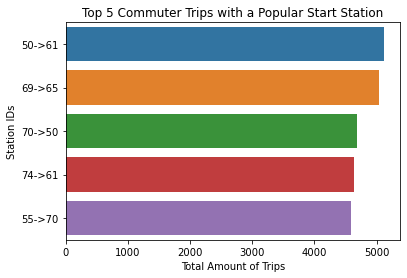

In [106]:
#barplot based on only stations where the start station was one of the most popular stops
ax = sns.barplot(y = commuter_trips_top_stations_top["stations"], x = commuter_trips_top_stations_top["total_trips"])
ax.set_xlabel('Total Amount of Trips')
ax.set_ylabel('Station IDs')
ax.set_title('Top 5 Commuter Trips with a Popular Start Station')

Text(0.5, 1.0, 'Top 5 Commuter Trips')

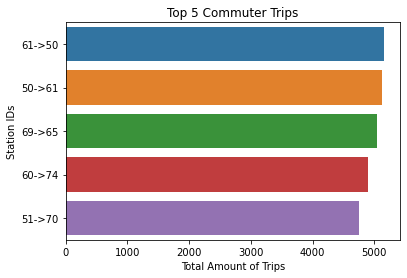

In [107]:
#barplot based on overall most popular trips
ax = sns.barplot(y = commuter_trips_top_trips_top["stations"], x = commuter_trips_top_trips_top["total_trips"])
ax.set_xlabel('Total Amount of Trips')
ax.set_ylabel('Station IDs')
ax.set_title('Top 5 Commuter Trips')

## What are your recommendations for offers (justify based on your findings)?

Some questions I would like to explore to give recommendations are the following:
- What type of membership do users have for commuter trips?
- When and where do non-members use bikes the most?
- How often do members use bikes when not during commuting hours?
- What does ride duration distribution look like?

#### Part 1: What type of membership do users have for commuter trips?
Using the definition from the previous section for commuter trips, lets see what type of membership people have when they use bikes during these trips.

In [113]:
%%bigquery commuter_trips_membership

SELECT subscriber_type, count(*) as total_trips, avg(duration_sec) as trip_duration
FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
WHERE EXTRACT(DAYOFWEEK FROM start_date) in (2,3,4,5,6) 
AND ((EXTRACT(HOUR FROM start_date) >= 7 AND EXTRACT(HOUR FROM start_date) <= 9) 
     OR (EXTRACT(HOUR FROM start_date) >= 16 AND EXTRACT(HOUR FROM start_date) <= 18))
AND start_station_id != end_station_id
GROUP BY subscriber_type

Downloading: 100%|██████████| 2/2 [00:01<00:00,  1.71rows/s]


In [114]:
commuter_trips_membership

,subscriber_type,total_trips,trip_duration
0,Subscriber,526819,571.716635
1,Customer,27312,2006.227080


We see a huge percentage of users are actually subscribers during commuter trips and only about 5% are customers. Even more so, it's interesting to see the huge different in trip duration between subscribers and customers. Let's take a look at the 5 most popular trips from customers compared to that of subscribers.

In [118]:
%%bigquery commuter_trips_customer

SELECT start_station_id, end_station_id, count(*) as total_trips
FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
WHERE EXTRACT(DAYOFWEEK FROM start_date) in (2,3,4,5,6) 
AND ((EXTRACT(HOUR FROM start_date) >= 7 AND EXTRACT(HOUR FROM start_date) <= 9) 
     OR (EXTRACT(HOUR FROM start_date) >= 16 AND EXTRACT(HOUR FROM start_date) <= 18))
AND start_station_id != end_station_id
AND subscriber_type = "Customer"
GROUP BY start_station_id, end_station_id
ORDER BY total_trips DESC 

Downloading: 100%|██████████| 1555/1555 [00:01<00:00, 1151.16rows/s]


In [120]:
commuter_trips_customer.head()

,start_station_id,end_station_id,total_trips
0,50,60,625
1,60,50,270
2,60,74,215
3,48,60,188
4,74,60,169


In [121]:
%%bigquery commuter_trips_subscriber

SELECT start_station_id, end_station_id, count(*) as total_trips
FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
WHERE EXTRACT(DAYOFWEEK FROM start_date) in (2,3,4,5,6) 
AND ((EXTRACT(HOUR FROM start_date) >= 7 AND EXTRACT(HOUR FROM start_date) <= 9) 
     OR (EXTRACT(HOUR FROM start_date) >= 16 AND EXTRACT(HOUR FROM start_date) <= 18))
AND start_station_id != end_station_id
AND subscriber_type = "Subscriber"
GROUP BY start_station_id, end_station_id
ORDER BY total_trips DESC 

Downloading: 100%|██████████| 1630/1630 [00:01<00:00, 1375.16rows/s]


In [123]:
commuter_trips_subscriber.head()

,start_station_id,end_station_id,total_trips
0,61,50,5034
1,50,61,4973
2,69,65,4958
3,60,74,4689
4,51,70,4686


The Top 5 most common trips by customers are: 
1. 50 (Harry Bridges Plaza (Ferry Building)) -> 60 (Powell at Post (Union Square))
2. 60 (Powell at Post (Union Square)) -> 50 (Harry Bridges Plaza (Ferry Building))
3. 60 (Powell at Post (Union Square)) -> 74 (Cyril Magnin St at Ellis St)
4. 48 (Embarcadero at Vallejo) -> 60 (Powell at Post (Union Square))
5. 74 (Cyril Magnin St at Ellis St) -> 60 (Powell at Post (Union Square))

The Top 5 most common trips by subscribers are:
1. 61 (Civic Center BART (7th at Market)) -> 50 (Harry Bridges Plaza (Ferry Building))
2. 50 (Harry Bridges Plaza (Ferry Building)) -> 61 (Civic Center BART (7th at Market))
3. 69 (San Francisco Caltrain 2 (330 Townsend)) -> 65 (Market at 4th)
4. 60 (Powell at Post (Union Square)) -> 74 (Cyril Magnin St at Ellis St)
5. 51 (2nd at Folsom) -> 70 (Ryland Park)

Interestingly, we see a common station in all 5 of the trips by customers, 60 (Powell at Post (Union Square)).

#### Part 2: When and where do non-members use bikes the most?

In [133]:
%%bigquery customer_days

SELECT EXTRACT(DAYOFWEEK FROM start_date) as week_day, count(*) as total_trips
FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
WHERE subscriber_type = "Customer"
GROUP BY week_day
ORDER BY week_day

Downloading: 100%|██████████| 7/7 [00:01<00:00,  5.65rows/s]


In [134]:
customer_days

,week_day,total_trips
0,1,25908
1,2,15142
2,3,14737
3,4,15237
4,5,16612
5,6,19929
6,7,29244


Text(0.5, 1.0, 'Number of Trips from Customers During the Week')

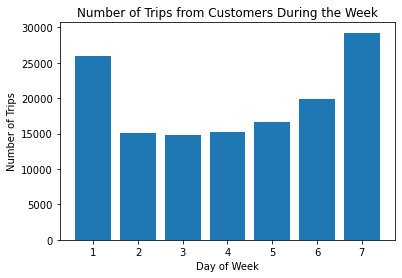

In [135]:
plt.bar(customer_days['week_day'], customer_days['total_trips'])
plt.xlabel("Day of Week")
plt.ylabel("Number of Trips")
plt.title("Number of Trips from Customers During the Week")

We see huge increases in ridership closer to the weekends by non-members. Numbers begin rising on Thursdays and Fridays, peaking at Saturday, high levels on Sundays, before dropping back down for the rest of the week.

Now, let's take a look at the most popular trips taken by customers.

In [136]:
%%bigquery customer_trips

SELECT start_station_id, end_station_id, count(*) as total_trips
FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
WHERE subscriber_type = "Customer"
GROUP BY start_station_id, end_station_id
ORDER BY total_trips DESC 

Downloading: 100%|██████████| 1819/1819 [00:01<00:00, 1560.75rows/s]


In [138]:
customer_trips.head(10)

,start_station_id,end_station_id,total_trips
0,50,60,3667
1,60,60,2545
2,50,50,2004
3,60,50,1638
4,48,60,1345
5,35,35,1113
6,50,48,868
7,74,60,847
8,76,76,811
9,76,60,770


Let's look at subscriber trips overall (not just during commuting trips) for comparison.

In [140]:
%%bigquery subscriber_trips

SELECT start_station_id, end_station_id, count(*) as total_trips
FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
WHERE subscriber_type = "Subscriber"
GROUP BY start_station_id, end_station_id
ORDER BY total_trips DESC 

Downloading: 100%|██████████| 1788/1788 [00:01<00:00, 1266.96rows/s]


In [141]:
subscriber_trips.head(10)

,start_station_id,end_station_id,total_trips
0,69,65,8305
1,61,50,6931
2,65,69,6641
3,50,61,6332
4,60,74,6200
5,51,70,6158
6,74,61,5758
7,70,50,5709
8,55,70,5699
9,74,70,5695


We can actually see that many of the trips made by customers have the same start and end station compared to trips made by subscribers which the more popular trips have different start and end stations.

#### Part 3: How often do members use bikes when not during commuting hours?

Let's take a look at when members use bikes when not during commuting trips as we defined earlier.

##### Trips in general by Subscribers

In [142]:
%%bigquery subscriber

SELECT count(*) as total_trips
FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
WHERE subscriber_type = "Subscriber"

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.66s/rows]


In [143]:
subscriber

,total_trips
0,846839


There are a total of 846,839 trips from Subscribers and we know 526,819 of these trips are commuter trips. That leaves 320,020 trips to examine for non-commuter hours.

##### Trips by Subscribers not during commuting

In [146]:
%%bigquery subscriber_non_commuting

SELECT *
FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
WHERE subscriber_type = "Subscriber"
AND NOT (EXTRACT(DAYOFWEEK FROM start_date) in (2,3,4,5,6) 
AND ((EXTRACT(HOUR FROM start_date) >= 7 AND EXTRACT(HOUR FROM start_date) <= 9) 
     OR (EXTRACT(HOUR FROM start_date) >= 16 AND EXTRACT(HOUR FROM start_date) <= 18))
     AND start_station_id != end_station_id)

Downloading: 100%|██████████| 320020/320020 [00:01<00:00, 191439.33rows/s]


In [147]:
subscriber_non_commuting.head()

,trip_id,duration_sec,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_number,zip_code,subscriber_type
0,969490,255,2015-10-13 19:02:00+00:00,Mezes,83,2015-10-13 19:07:00+00:00,Mezes,83,650,94063,Subscriber
1,947105,1008,2015-09-26 12:57:00+00:00,Mezes,83,2015-09-26 13:13:00+00:00,Mezes,83,157,94063,Subscriber
2,1011650,60,2015-11-16 18:54:00+00:00,Mezes,83,2015-11-16 18:55:00+00:00,Mezes,83,35,94124,Subscriber
3,1092841,1021,2016-02-14 05:25:00+00:00,Kaiser Hospital,26,2016-02-14 05:42:00+00:00,Mezes,83,246,94025,Subscriber
4,1047069,1113,2015-12-25 13:17:00+00:00,San Mateo County Center,23,2015-12-25 13:35:00+00:00,Mezes,83,149,94063,Subscriber


Let's look at how often during the week subscribers use bikes while not during commuting hours.

In [148]:
%%bigquery subscriber_non_commuting_trips

SELECT EXTRACT(DAYOFWEEK FROM start_date) as week_day, count(*) as total_trips
FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
WHERE subscriber_type = "Subscriber"
AND NOT (EXTRACT(DAYOFWEEK FROM start_date) in (2,3,4,5,6) 
AND ((EXTRACT(HOUR FROM start_date) >= 7 AND EXTRACT(HOUR FROM start_date) <= 9) 
     OR (EXTRACT(HOUR FROM start_date) >= 16 AND EXTRACT(HOUR FROM start_date) <= 18))
     AND start_station_id != end_station_id)
GROUP BY week_day
ORDER BY week_day

Downloading: 100%|██████████| 7/7 [00:01<00:00,  5.97rows/s]


In [149]:
subscriber_non_commuting_trips

,week_day,total_trips
0,1,25467
1,2,48595
2,3,55325
3,4,55122
4,5,55140
5,6,49336
6,7,31035


Text(0.5, 1.0, 'Number of Trips from Subscribers During the Week (Excluding Commute)')

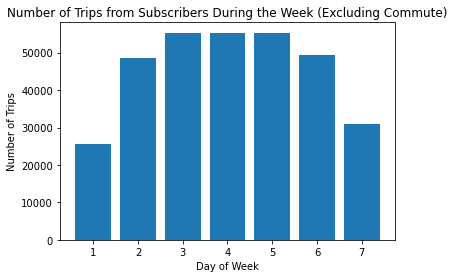

In [150]:
plt.bar(subscriber_non_commuting_trips['week_day'], subscriber_non_commuting_trips['total_trips'])
plt.xlabel("Day of Week")
plt.ylabel("Number of Trips")
plt.title("Number of Trips from Subscribers During the Week (Excluding Commute)")

This is interesting compared to the graph we made for Customers. For Customers, we saw peak levels for the weekends, but for Subscribers, we actually see an inverse. Even during non-commute hours, there are still higher levels of usage during the week than any other day.

#### Part 4: What does ride duration distribution look like?

##### Subscriber Trip Duration (with Commutes)

In [154]:
%%bigquery subscriber_trips_dur

SELECT EXTRACT(DAYOFWEEK FROM start_date) as week_day, count(*) as total_trips, avg(duration_sec) as trip_dur
FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
WHERE subscriber_type = "Subscriber"
GROUP BY week_day
ORDER BY week_day

Downloading: 100%|██████████| 7/7 [00:02<00:00,  2.99rows/s]


In [155]:
subscriber_trips_dur

,week_day,total_trips,trip_dur
0,1,25467,679.321436
1,2,154795,572.989444
2,3,169668,566.227674
3,4,165530,572.846837
4,5,160296,568.490324
5,6,140048,597.379827
6,7,31035,703.356758


##### Subscriber Trip Duration (without Commutes)

In [151]:
%%bigquery subscriber_non_commuting_trips_dur

SELECT EXTRACT(DAYOFWEEK FROM start_date) as week_day, count(*) as total_trips, avg(duration_sec) as trip_dur
FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
WHERE subscriber_type = "Subscriber"
AND NOT (EXTRACT(DAYOFWEEK FROM start_date) in (2,3,4,5,6) 
AND ((EXTRACT(HOUR FROM start_date) >= 7 AND EXTRACT(HOUR FROM start_date) <= 9) 
     OR (EXTRACT(HOUR FROM start_date) >= 16 AND EXTRACT(HOUR FROM start_date) <= 18))
     AND start_station_id != end_station_id)
GROUP BY week_day
ORDER BY week_day

Downloading: 100%|██████████| 7/7 [00:01<00:00,  5.04rows/s]


In [152]:
subscriber_non_commuting_trips_dur

,week_day,total_trips,trip_dur
0,1,25467,679.321436
1,2,48595,586.553781
2,3,55325,561.470456
3,4,55122,575.504245
4,5,55140,577.211734
5,6,49336,609.494284
6,7,31035,703.356758


##### Customer Trip Duration

In [156]:
%%bigquery customer_trips_dur

SELECT EXTRACT(DAYOFWEEK FROM start_date) as week_day, count(*) as total_trips, avg(duration_sec) as trip_dur
FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
WHERE subscriber_type = "Customer"
GROUP BY week_day
ORDER BY week_day

Downloading: 100%|██████████| 7/7 [00:01<00:00,  4.94rows/s]


In [157]:
customer_trips_dur

,week_day,total_trips,trip_dur
0,1,25908,4110.214760
1,2,15142,3251.470347
2,3,14737,3119.849494
3,4,15237,3103.364770
4,5,16612,3233.182880
5,6,19929,3629.364494
6,7,29244,4573.233518


##### Overall Trip Duration

In [158]:
%%bigquery trips_dur

SELECT EXTRACT(DAYOFWEEK FROM start_date) as week_day, count(*) as total_trips, avg(duration_sec) as trip_dur
FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
GROUP BY week_day
ORDER BY week_day

Downloading: 100%|██████████| 7/7 [00:01<00:00,  5.89rows/s]


In [188]:
trips_dur

,week_day,total_trips,trip_dur
0,1,51375,2409.493392
1,2,169937,811.651759
2,3,184405,770.304162
3,4,180767,786.146288
4,5,176908,818.710058
5,6,159977,975.086762
6,7,60279,2580.804559


Let's look at these dataframes as bar plots side by side.

Text(0.06, 0.5, 'Average Trip Duration')

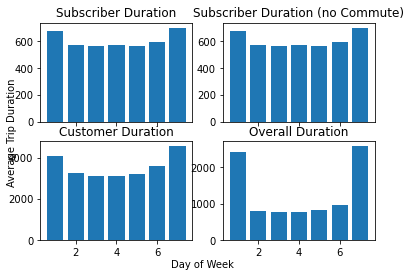

In [200]:
fig, axs = plt.subplots(2, 2, sharex=True)
axs[0,0].bar(subscriber_trips_dur["week_day"],subscriber_trips_dur["trip_dur"])
axs[0,0].set_title("Subscriber Duration")
axs[0,1].bar(subscriber_non_commuting_trips_dur["week_day"],subscriber_non_commuting_trips_dur["trip_dur"])
axs[0,1].set_title("Subscriber Duration (no Commute)")
axs[1,0].bar(customer_trips_dur["week_day"],customer_trips_dur["trip_dur"])
axs[1,0].set_title("Customer Duration")
axs[1,1].bar(trips_dur["week_day"],trips_dur["trip_dur"])
axs[1,1].set_title("Overall Duration")

fig.text(0.5, 0.04, 'Day of Week', ha='center', va='center')
fig.text(0.06, 0.5, 'Average Trip Duration', ha='center', va='center', rotation='vertical')

### Conclusion

Our current plans include
- Annual or monthly membership
    - no unlock fee
    - 45 free minutes of ride time and 20¢ extra per minute after
- Single Trip
    - $3 unlock fee
    - 30 minutes of free ride time and 30¢ extra per minute after
- Bike Share for All (Annual with income restrictions)
    - no unlock fee
    - 60 free minutes of ride time and 13¢ extra per minute after

As well as deals for businesses and students.

##### Potential Offers

1. Commuter Trip Deals
    * A potential promotion could be for non-members to have a commuter trip deal
    * This would entail from Mondays-Fridays 7am-9am and 4pm-6pm, non-members would get a discount which could include:
        - a low to no unlock fee
        - longer minutes of free riding
        - lower rates of charge per minute after the designated free ride time
    * Part 1 shows that though the majority of users during commuter hours are members already, however, there are still many users who are not
    * Having a promotion like this could prompt more usage from customers and some turnover from customers to members
    * Though this should be limited time offer so our current members do not cancel their membership to opt for this offer.
2. Weekend Deals
    * Part 2 shows usage from customers who are not currently members and we found super high peaks of usage on the weekends from customers
    * We could propose a new plan for weekend usage that could include no unlock fee and longer free minutes of ride time for a price slightly above that of our other memberships yet saves customers money from being non-members. 
    * The average ride time from users in general on the weekends, shown in part 4, is around 40 minutes to 45 minutes. We could calculate a fee that benefits both our company as well as our users
3. Same Start and End Station Deals
    * We also see in part 2 that customers, aka non-members, use our products from the same start and end stations compared to our regular members who more often have different start and end stations
    * We deal with a problem where sometimes stations do not have enough bikes to provide or have too much
    * A way to deal with this problem and encourage more return at the same station is to have a discount when a user start and ends their trip at the same station
4. Hourly Price
    * Lastly, we currently do not have a plan hour usage less than monthly but more than single use, say by the hour or by every 3 hours
    * Devising a rental plan for a measure of time more than minutes can be useful in attracting new users and even current customers extending their trips
    * A customer concern with single trip plans is they may not know the actual cost of their trip until after their trip
    * Having a price for hourly helps a customer understand their time limits and helps them with cost worries.